## Import Package

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.layers import LSTM

## Data

In [4]:
train = pd.read_csv('/content/drive/My Drive/FIND IT 2024/train_features.csv')
label = pd.read_csv('/content/drive/My Drive/FIND IT 2024/train_labels.csv')
test = pd.read_csv('/content/drive/My Drive/FIND IT 2024/test_features.csv')
submission = pd.read_csv('/content/drive/My Drive/FIND IT 2024/submission_format.csv')

In [5]:
data = pd.concat([train, label], axis=1)

In [6]:
data.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

## Praproses Data

#### Menyesuaikan Format Data

In [8]:
data['pendidikan'].unique()

array(['Sarjana', 'Magister', 'SMA', 'SMP', 'Doktor', nan, '5'],
      dtype=object)

In [9]:
data['status_pernikahan'].unique()

array(['Rencana Menikah', 'Menikah', 'Sendiri', 'Cerai', nan,
       'Cerai Mati', '5'], dtype=object)

In [10]:
data['keluhan'] = data['keluhan'].astype(object)

In [11]:
data['keluhan'].unique()

array([0.0, nan, 1.0], dtype=object)

#### Menangani Data Hilang

In [12]:
missing_data = data.isna().sum()
total_rows = len(train)
missing_percentage = (missing_data / total_rows) * 100
missing_info = pd.concat([missing_data, missing_percentage], axis=1)
missing_info.columns = ['Jumlah Hilang', 'Persentase Hilang']
missing_info

,Jumlah Hilang,Persentase Hilang
tahun_kelahiran,0,0.000000
pendidikan,189,4.951533
status_pernikahan,212,5.554100
pendapatan,190,4.977731
jumlah_anak_balita,190,4.977731
jumlah_anak_remaja,204,5.344511
terakhir_belanja,172,4.506157
belanja_buah,181,4.741944
belanja_daging,178,4.663348
belanja_ikan,193,5.056327


In [13]:
df = data.copy()

In [14]:
df.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


In [15]:
df['pendidikan'] = df['pendidikan'].replace('5', 'Doktor')

In [16]:
df['status_pernikahan'] = df['status_pernikahan'].replace('5', 'Cerai Mati')

In [17]:
df['pendidikan'].unique()

array(['Sarjana', 'Magister', 'SMA', 'SMP', 'Doktor', nan], dtype=object)

In [18]:
df['status_pernikahan'].unique()

array(['Rencana Menikah', 'Menikah', 'Sendiri', 'Cerai', nan,
       'Cerai Mati'], dtype=object)

In [19]:
missing_data = df.isna().sum()
total_rows = len(df)
missing_percentage = (missing_data / total_rows) * 100
missing_info = pd.concat([missing_data, missing_percentage], axis=1)
missing_info.columns = ['Jumlah Hilang', 'Persentase Hilang']
missing_info

,Jumlah Hilang,Persentase Hilang
tahun_kelahiran,0,0.000000
pendidikan,189,4.951533
status_pernikahan,212,5.554100
pendapatan,190,4.977731
jumlah_anak_balita,190,4.977731
jumlah_anak_remaja,204,5.344511
terakhir_belanja,172,4.506157
belanja_buah,181,4.741944
belanja_daging,178,4.663348
belanja_ikan,193,5.056327


#### Handling NA

In [20]:
from datetime import datetime

In [ ]:
saat_ini = datetime.now()
df['tanggal_menjadi_anggota'] = pd.to_datetime(df['tanggal_menjadi_anggota'])
df['lama_keanggotaan'] = (saat_ini.year - df['tanggal_menjadi_anggota'].dt.year) * 12 + (saat_ini.month - df['tanggal_menjadi_anggota'].dt.month)
median_lama_keanggotaan = df['lama_keanggotaan'].median()
df['lama_keanggotaan'].fillna(median_lama_keanggotaan, inplace=True)
df['tahun_keanggotaan'] = df['lama_keanggotaan'] // 12

In [21]:
df.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


In [22]:
kolom_mode = ['pendidikan', 'status_pernikahan', 'keluhan']
kolom_median = ['pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
              'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
              'pembelian_diskon', 'pembelian_web', 'pembelian_toko']

In [ ]:
for col in kolom_mode:
    mode_val = df[col].mode()[0]  # Ambil nilai mode
    df[col].fillna(mode_val, inplace=True)

for col in kolom_median:
    median_val = df[col].median()  # Ambil nilai rata-rata
    df[col].fillna(median_val, inplace=True)

In [ ]:
df.drop(['tanggal_menjadi_anggota', 'lama_keanggotaan'], axis=1, inplace=True)

In [ ]:
df.isna().sum()

tahun_kelahiran       0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
tahun_keanggotaan     0
dtype: int64

#### Features Enginering

In [ ]:
tahun_saat_ini = datetime.now().year
df['usia'] = tahun_saat_ini - df['tahun_kelahiran']

#### Encoding Variabel

In [ ]:
mapping = {
    'Sendiri': 1,
    'Rencana Menikah': 2,
    'Menikah': 3,
    'Cerai': 4,
    'Cerai Mati': 5
}

df['status_pernikahan'] = df['status_pernikahan'].replace(mapping)

In [ ]:
df['status_pernikahan'].unique()

array([2, 3, 1, 4, 5])

In [ ]:
mapping = {
    'SMP': 1,
    'SMA': 2,
    'Sarjana': 3,
    'Magister': 4,
    'Doktor': 5
}

df['pendidikan'] = df['pendidikan'].replace(mapping)

In [ ]:
df['pendidikan'].unique()

array([3, 4, 2, 1, 5])

#### Standarisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
var_to_standardize = ['pendapatan', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']
scaler = StandardScaler()
df[var_to_standardize] = scaler.fit_transform(df[var_to_standardize])

In [ ]:
df.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi,tahun_keanggotaan,usia
0,1979,3,2,0.025533,0.0,1.0,47.0,-0.105364,-0.333698,-0.291698,-0.530330,2.0,2.0,5.0,0.0,2,9.0,45
1,1950,3,2,-0.719475,0.0,0.0,70.0,-0.718517,-0.764918,0.018234,-0.530330,9.0,6.0,4.0,0.0,0,11.0,74
2,1966,3,3,0.306723,0.0,0.0,45.0,0.818182,-0.324748,0.175738,1.084939,1.0,1.0,7.0,0.0,1,10.0,58
3,1961,4,2,1.204910,0.0,0.0,90.0,2.040671,2.361529,-0.525079,0.831005,0.0,7.0,8.0,0.0,4,10.0,63
4,1970,3,2,0.074678,1.0,1.0,78.0,0.445545,-0.232518,-0.396051,-0.354490,7.0,6.0,5.0,0.0,4,10.0,54


In [ ]:
df.drop(['tahun_kelahiran'], axis=1, inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

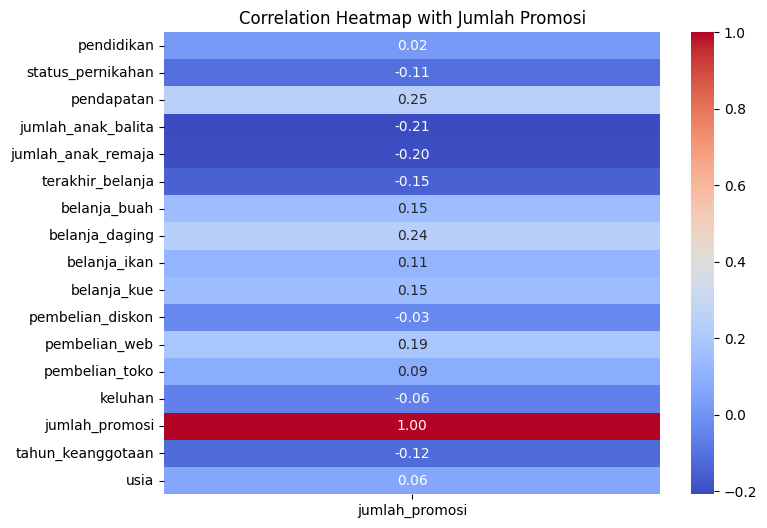

In [ ]:
corr_jumlah_promosi = df.corr()['jumlah_promosi']
plt.figure(figsize=(8, 6))
sns.heatmap(corr_jumlah_promosi.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Jumlah Promosi')
plt.show()

## Praproses Data Test

In [ ]:
test = pd.read_csv('/content/drive/My Drive/FIND IT 2024/test_features.csv')

In [ ]:
test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3614 non-null   object 
 3   status_pernikahan        3636 non-null   object 
 4   pendapatan               3615 non-null   float64
 5   jumlah_anak_balita       3609 non-null   float64
 6   jumlah_anak_remaja       3608 non-null   float64
 7   terakhir_belanja         3617 non-null   float64
 8   belanja_buah             3632 non-null   float64
 9   belanja_daging           3623 non-null   float64
 10  belanja_ikan             3622 non-null   float64
 11  belanja_kue              3631 non-null   float64
 12  pembelian_diskon         3639 non-null   float64
 13  pembelian_web            3638 non-null   float64
 14  pembelian_toko          

In [ ]:
test.isna().sum()

ID                            0
tahun_kelahiran               0
pendidikan                  204
status_pernikahan           182
pendapatan                  203
jumlah_anak_balita          209
jumlah_anak_remaja          210
terakhir_belanja            201
belanja_buah                186
belanja_daging              195
belanja_ikan                196
belanja_kue                 187
pembelian_diskon            179
pembelian_web               180
pembelian_toko              186
keluhan                     193
tanggal_menjadi_anggota    2759
dtype: int64

In [ ]:
saat_ini = datetime.now()
test['tanggal_menjadi_anggota'] = pd.to_datetime(test['tanggal_menjadi_anggota'])
test['lama_keanggotaan'] = (saat_ini.year - test['tanggal_menjadi_anggota'].dt.year) * 12 + (saat_ini.month - test['tanggal_menjadi_anggota'].dt.month)
median_lama_keanggotaan = test['lama_keanggotaan'].median()
test['lama_keanggotaan'].fillna(median_lama_keanggotaan, inplace=True)
test['tahun_keanggotaan'] = test['lama_keanggotaan'] // 12

In [ ]:
test.drop(['tanggal_menjadi_anggota', 'lama_keanggotaan'], axis=1, inplace=True)

In [ ]:
kolom_mode = ['pendidikan', 'status_pernikahan', 'keluhan']
kolom_median = ['pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
              'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
              'pembelian_diskon', 'pembelian_web', 'pembelian_toko']

In [ ]:
for col in kolom_mode:
    mode_val = test[col].mode()[0]  # Ambil nilai mode
    test[col].fillna(mode_val, inplace=True)

for col in kolom_median:
    median_val = test[col].median()  # Ambil nilai tengah
    test[col].fillna(median_val, inplace=True)

In [ ]:
test['usia'] = tahun_saat_ini - test['tahun_kelahiran']

In [ ]:
test.drop(['tahun_kelahiran'], axis=1, inplace=True)

In [ ]:
mapping = {
    'SMP': 1,
    'SMA': 2,
    'Sarjana': 3,
    'Magister': 4,
    'Doktor': 5
}

test['pendidikan'] = test['pendidikan'].replace(mapping)

In [ ]:
mapping = {
    'Sendiri': 1,
    'Rencana Menikah': 2,
    'Menikah': 3,
    'Cerai': 4,
    'Cerai Mati': 5
}

test['status_pernikahan'] = test['status_pernikahan'].replace(mapping)

In [ ]:
test.isna().sum()

ID                    0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
tahun_keanggotaan     0
usia                  0
dtype: int64

In [ ]:
var_to_standardize = ['pendapatan', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']
scaler = StandardScaler()
test[var_to_standardize] = scaler.fit_transform(test[var_to_standardize])

In [ ]:
test.head()

,ID,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tahun_keanggotaan,usia
0,2241,3,2,0.085775,0.0,1.0,63.0,0.833857,0.199048,1.291520,0.288872,4.0,6.0,10.0,0.0,10.0,67
1,2274,5,3,0.949314,0.0,1.0,58.0,-0.318798,-0.176071,-0.193438,-0.273274,2.0,5.0,10.0,0.0,10.0,56
2,1107,2,3,-1.742367,0.0,0.0,34.0,-0.687432,-0.836460,-0.518534,-0.466062,2.0,0.0,5.0,0.0,10.0,56
3,4478,5,3,0.031194,0.0,1.0,82.0,-0.730333,-0.629400,-0.817294,-0.681508,3.0,5.0,7.0,0.0,10.0,53
4,5080,3,2,0.973661,0.0,0.0,28.0,3.777326,1.944482,1.508159,0.594341,0.0,1.0,8.0,0.0,10.0,50


## Split Data

In [ ]:
X = df.drop(columns=['jumlah_promosi'])
y = df['jumlah_promosi']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.head()

,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi,tahun_keanggotaan,usia
0,3,2,0.025533,0.0,1.0,47.0,-0.105364,-0.333698,-0.291698,-0.530330,2.0,2.0,5.0,0.0,2,9.0,45
1,3,2,-0.719475,0.0,0.0,70.0,-0.718517,-0.764918,0.018234,-0.530330,9.0,6.0,4.0,0.0,0,11.0,74
2,3,3,0.306723,0.0,0.0,45.0,0.818182,-0.324748,0.175738,1.084939,1.0,1.0,7.0,0.0,1,10.0,58
3,4,2,1.204910,0.0,0.0,90.0,2.040671,2.361529,-0.525079,0.831005,0.0,7.0,8.0,0.0,4,10.0,63
4,3,2,0.074678,1.0,1.0,78.0,0.445545,-0.232518,-0.396051,-0.354490,7.0,6.0,5.0,0.0,4,10.0,54


## Modelling

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgboost = XGBClassifier(n_estimators=1000)
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgboost = model_xgboost.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred_xgboost)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [ ]:
f1 = f1_score(y_val, y_pred_xgboost, average='weighted')
print(f"F1-score: {f1:.2f}")

F1-score: 0.70


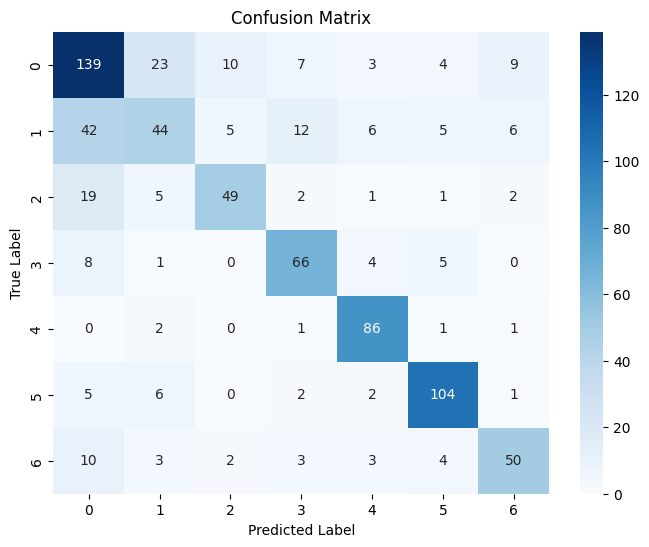

In [ ]:
y_pred_xgboost_classes = y_pred_xgboost
cm = confusion_matrix(y_val, y_pred_xgboost_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
feature_importance = model_xgboost.feature_importances_
feature_importance

array([0.06983983, 0.06246111, 0.08853801, 0.08028755, 0.09316763,
       0.04979408, 0.04273818, 0.0591055 , 0.04440119, 0.04335672,
       0.05228743, 0.05584887, 0.05279769, 0.03054527, 0.12953557,
       0.04529539], dtype=float32)

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/FIND IT 2024/submission_format.csv')

In [ ]:
submission.head()

,ID,jumlah_promosi
0,2241,6
1,2274,6
2,1107,6
3,4478,6
4,5080,6


In [ ]:
test['pendidikan'] = test['pendidikan'].astype(int)
test['status_pernikahan'] = test['status_pernikahan'].astype(int)

In [ ]:
test.head()

,ID,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tahun_keanggotaan,usia
0,2241,3,2,0.085775,0.0,1.0,63.0,0.833857,0.199048,1.291520,0.288872,4.0,6.0,10.0,0.0,10.0,67
1,2274,5,3,0.949314,0.0,1.0,58.0,-0.318798,-0.176071,-0.193438,-0.273274,2.0,5.0,10.0,0.0,10.0,56
2,1107,2,3,-1.742367,0.0,0.0,34.0,-0.687432,-0.836460,-0.518534,-0.466062,2.0,0.0,5.0,0.0,10.0,56
3,4478,5,3,0.031194,0.0,1.0,82.0,-0.730333,-0.629400,-0.817294,-0.681508,3.0,5.0,7.0,0.0,10.0,53
4,5080,3,2,0.973661,0.0,0.0,28.0,3.777326,1.944482,1.508159,0.594341,0.0,1.0,8.0,0.0,10.0,50


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3818 non-null   int64  
 1   pendidikan          3818 non-null   int64  
 2   status_pernikahan   3818 non-null   int64  
 3   pendapatan          3818 non-null   float64
 4   jumlah_anak_balita  3818 non-null   float64
 5   jumlah_anak_remaja  3818 non-null   float64
 6   terakhir_belanja    3818 non-null   float64
 7   belanja_buah        3818 non-null   float64
 8   belanja_daging      3818 non-null   float64
 9   belanja_ikan        3818 non-null   float64
 10  belanja_kue         3818 non-null   float64
 11  pembelian_diskon    3818 non-null   float64
 12  pembelian_web       3818 non-null   float64
 13  pembelian_toko      3818 non-null   float64
 14  keluhan             3818 non-null   float64
 15  tahun_keanggotaan   3818 non-null   float64
 16  usia  

## Prediksi

In [ ]:
predictions = model_xgboost.predict(test.drop('ID', axis=1))
submission = test[['ID']].copy()
submission['jumlah_promosi'] = predictions

In [ ]:
submission.to_csv('/content/drive/My Drive/FIND IT 2024/submission4.csv', index=False)